# Week 10-3 RNN을 활용한 감성 분석 - 한글

In [2]:
# 데이터 읽기

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week10')
review_df=pd.read_csv("thinq_review_result.csv")

review_df

date  star  like  \
0      2021년 09월 05일     1  36.0   
1      2021년 09월 06일     1  15.0   
2      2021년 09월 05일     1   8.0   
3      2021년 09월 06일     2   2.0   
4      2021년 09월 07일     1   NaN   
...              ...   ...   ...   
11374  2019년 02월 23일     5   NaN   
11375  2019년 03월 07일     5   NaN   
11376  2019년 03월 03일     5   NaN   
11377  2019년 03월 27일     5   NaN   
11378  2019년 02월 26일     5   NaN   

                                                 comment  \
0      추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...   
1      그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...   
2      퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...   
3      에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...   
4      LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...   
...                                                  ...   
11374                                            좋아요....   
11375                                             좋아요~~~   
11376                                             굿뜨~~~♡   
11377                                                굿~~   
11378                                           좋아요👍👍👍👍👍   

                                               comment_n  \
0      [['추가', '정보', '등록', '앱', '설정', '충분하다', '굳이', '...   
1      [['그냥', '엘지', '제품', '리모컨', '사용', '정신', '건강', '...   
2      [['퓨리', '케어', '공기청정기', '단', '짜다', '사용', '중', '...   
3      [['에너지', '모니터링', '지난달', '대비', '용량', '전달', '달',...   
4      [['LG', '옙', '서비스', '작동', '기능', '자다', '짜증', '나...   
...                                                  ...   
11374                                           [['좋다']]   
11375                                           [['좋다']]   
11376                                            [['굿']]   
11377                                            [['굿']]   
11378                                           [['좋다']]   

                                         comment_n_spell  
0      ['추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 ...  
1      ['그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다', '앱에서...  
2      ['퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시...  
3      ['에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다', '보기...  
4      ['LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네', '통신사 이동하고 삼...  
...                                                  ...  
11374                                           ['좋아요 ']  
11375                                           ['좋아요 ']  
11376                                              ['굿']  
11377                                             ['굿 ']  
11378                                           ['좋아요 ']  

[11379 rows x 6 columns]

In [3]:
# 목표 변수 만들기(이전 예제와 동일)
del_index=review_df[review_df['star']==3].index
review_df.drop(del_index,axis=0,inplace=True)
review_df.shape

(10599, 6)

In [4]:
review_df['sentiment']=review_df['star'].apply(lambda x: 1 if x>=4 else 0)
review_df

date  star  like  \
0      2021년 09월 05일     1  36.0   
1      2021년 09월 06일     1  15.0   
2      2021년 09월 05일     1   8.0   
3      2021년 09월 06일     2   2.0   
4      2021년 09월 07일     1   NaN   
...              ...   ...   ...   
11374  2019년 02월 23일     5   NaN   
11375  2019년 03월 07일     5   NaN   
11376  2019년 03월 03일     5   NaN   
11377  2019년 03월 27일     5   NaN   
11378  2019년 02월 26일     5   NaN   

                                                 comment  \
0      추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...   
1      그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...   
2      퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...   
3      에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...   
4      LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...   
...                                                  ...   
11374                                            좋아요....   
11375                                             좋아요~~~   
11376                                             굿뜨~~~♡   
11377                                                굿~~   
11378                                           좋아요👍👍👍👍👍   

                                               comment_n  \
0      [['추가', '정보', '등록', '앱', '설정', '충분하다', '굳이', '...   
1      [['그냥', '엘지', '제품', '리모컨', '사용', '정신', '건강', '...   
2      [['퓨리', '케어', '공기청정기', '단', '짜다', '사용', '중', '...   
3      [['에너지', '모니터링', '지난달', '대비', '용량', '전달', '달',...   
4      [['LG', '옙', '서비스', '작동', '기능', '자다', '짜증', '나...   
...                                                  ...   
11374                                           [['좋다']]   
11375                                           [['좋다']]   
11376                                            [['굿']]   
11377                                            [['굿']]   
11378                                           [['좋다']]   

                                         comment_n_spell  sentiment  
0      ['추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 ...          0  
1      ['그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다', '앱에서...          0  
2      ['퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시...          0  
3      ['에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다', '보기...          0  
4      ['LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네', '통신사 이동하고 삼...          0  
...                                                  ...        ...  
11374                                           ['좋아요 ']          1  
11375                                           ['좋아요 ']          1  
11376                                              ['굿']          1  
11377                                             ['굿 ']          1  
11378                                           ['좋아요 ']          1  

[10599 rows x 7 columns]

<AxesSubplot:>

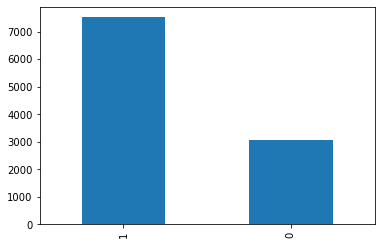

In [5]:
# 목표 변수 분포
review_df['sentiment'].value_counts().plot(kind='bar')

In [6]:
# 입력 변수와 출력 변수 분리
X_data = review_df['comment_n_spell'].apply(lambda x: ' '.join(eval(x)))
y_data = review_df['sentiment']

In [7]:
# 토큰화
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)
print(sequences)

[[324, 188, 890, 6, 1849, 1850, 57, 4, 4748, 638, 99, 7400, 1851, 7401, 7402, 365, 453, 1367, 933, 324, 188, 639, 353, 1667, 7403, 104, 12, 7404, 481, 2444, 3607, 1045, 6, 306, 3608, 291, 7405, 758, 2445, 2446, 797, 933, 35, 191, 7406, 2898, 7407, 270, 308, 7408, 7409, 7410, 121, 365, 188, 3609, 7411, 7412, 1109, 7413, 2899, 7414, 365, 453, 7415, 7416, 3610, 7417, 4749], [72, 33, 312, 2900, 500, 551, 1852, 7418, 186, 1205, 235, 10, 313, 10, 63, 2901, 24, 245, 424, 63, 1368, 10, 7419, 153, 324, 59, 2111, 14, 4750, 2902, 1046, 7420, 839, 934, 1206, 64, 72, 125, 212, 551, 7421, 41, 298, 935, 6, 145, 314, 2903, 41, 3611, 7422, 7423, 150, 1509, 2447, 4751, 891, 3, 798, 2904, 314, 2903, 41, 3611, 7424, 45, 189, 2112], [366, 391, 54, 4752, 20, 108, 4753, 982, 54, 2113, 669, 1047, 74, 2114, 7425, 3612, 482, 206, 21, 138, 7426, 16, 200, 21, 1110, 147, 4754, 4755, 1510, 240, 259, 164], [309, 392, 7427, 2448, 501, 37, 4756, 397, 7428, 7429, 3613, 1668, 592, 2905, 25, 115, 4757, 7430], [19, 7431, 

In [8]:
# 단어-to-인덱스 확인하기
word_to_index = tokenizer.word_index
print(word_to_index)

{'좋아요': 1, '안': 2, '잘': 3, '수': 4, '너무': 5, '앱': 6, '연결': 7, '에어컨': 8, '왜': 9, '제품': 10, '연결이': 11, '다시': 12, '좋네요': 13, '다': 14, '굿': 15, '거': 16, '업데이트': 17, '좀': 18, 'lg': 19, '사용': 20, '어플': 21, '게': 22, '정말': 23, '후': 24, '더': 25, '편해요': 26, '쓰고': 27, '와이파이': 28, '세탁기': 29, '계속': 30, '있는': 31, '아주': 32, '엘지': 33, '건조기': 34, '스마트': 35, '좋습니다': 36, '이': 37, '사용하고': 38, '편하고': 39, '기능': 40, '것': 41, '있어서': 42, '있어요': 43, '하고': 44, '하는': 45, '한': 46, '건지': 47, '있습니다': 48, '다른': 49, '진짜': 50, 'good': 51, '기능이': 52, '안되네요': 53, '공기청정기': 54, '되는': 55, '못': 56, '할': 57, '때': 58, '등록': 59, '건': 60, '편리합니다': 61, '편리하고': 62, '전원': 63, '안되고': 64, '안됨': 65, '이런': 66, '편리해요': 67, '되고': 68, '앱이': 69, '갑자기': 70, '있는데': 71, '그냥': 72, '앱을': 73, '좋음': 74, '되네요': 75, '사용하기': 76, '있어': 77, '어떻게': 78, '서버': 79, '편리하네요': 80, '해도': 81, '뭐': 82, '자꾸': 83, '시간': 84, '알림이': 85, '됨': 86, '알림': 87, '건가요': 88, 'tv': 89, '집에': 90, '몇': 91, '좋은': 92, '편하네요': 93, '같아요': 94, '스타일러': 95, '이거': 96, '제대로': 97, '됩니다':

In [9]:
# 단어 빈도수 확인
tokenizer.word_counts.items()

odict_items([('추가', 49), ('정보', 75), ('등록은', 17), ('앱', 619), ('설정에서', 7), ('충분히', 7), ('할', 185), ('수', 911), ('있음에도', 2), ('굳이', 24), ('기기', 128), ('화면마다', 1), ('상단', 7), ('배치하여', 1), ('끈질기게', 1), ('개인', 43), ('정보를', 34), ('요구하는', 10), ('점', 16), ('등록을', 24), ('일', 45), ('회', 8), ('거부', 1), ('시', 121), ('다시', 522), ('묻지', 1), ('않는', 32), ('구', 5), ('버전을', 3), ('사용하면', 14), ('실행', 52), ('시마다', 3), ('업데이트를', 54), ('강요하는', 1), ('개발자', 20), ('팝업이', 5), ('지속적으로', 5), ('뜨는', 19), ('스마트', 259), ('씽', 74), ('스나', 1), ('미혼', 4), ('투야', 1), ('등', 57), ('어느', 51), ('유사', 1), ('앱들에서도', 1), ('전례가', 1), ('없는', 107), ('요구에', 3), ('정부', 1), ('유관부서에', 1), ('문의', 13), ('예정이다', 1), ('소비자를', 4), ('기망하여', 1), ('이용한', 1), ('마케팅질을', 1), ('당장', 3), ('중단하길', 1), ('바란다', 2), ('그냥', 161), ('엘지', 270), ('제품은', 50), ('리모컨만', 4), ('사용하는', 31), ('것이', 28), ('정신', 7), ('건강에', 1), ('좋을', 76), ('듯합니다', 12), ('앱에서', 63), ('제품', 553), ('삭제하고', 50), ('전원', 177), ('차단', 4), ('후', 352), ('분', 61), ('후에', 37), ('켜서', 10), 

In [10]:
# 한 번 출현한 단어 비율 확인하기
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


등장 빈도가 1번 이하인 희귀 단어의 수: 12824
단어 집합(vocabulary)에서 희귀 단어의 비율: 63.41294565593631
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 12.377661525394283


In [11]:
# 단어 사이즈 확인
vocab_size = len(word_to_index) + 1  # 패딩을 위한 토큰인 0번 고려
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 20224


텍스트의 최대 길이 : 94
텍스트의 최소 길이 : 0
텍스트의 평균 길이 : 9.775073


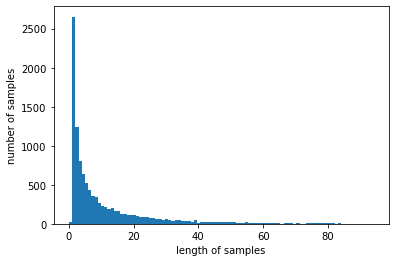

In [12]:
# 텍스트 길이 분포 보기
X_data = sequences
print('텍스트의 최대 길이 : %d' % max(len(l) for l in X_data))
print('텍스트의 최소 길이 : %d' % min(len(l) for l in X_data))
print('텍스트의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=95)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [13]:
# 패딩과 훈련 데이터, 테스트 데이터 나누기
max_len = 94
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

# 훈련 데이터와 테스트 데이터 분리

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y_data, test_size=0.3, random_state=12)
print('train data set size = {0},  test data set size = {1}'.format(x_train.shape[0],x_test.shape[0]))

훈련 데이터의 크기(shape):  (10599, 94)
train data set size = 7419,  test data set size = 3180


In [14]:
# SimpleRNN 모델 만들기
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 32)) 
model.add(SimpleRNN(32)) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
93/93 [==============================] - 3s 17ms/step - loss: 0.3823 - acc: 0.8310 - val_loss: 0.2567 - val_acc: 0.9090
Epoch 2/10
93/93 [==============================] - 1s 15ms/step - loss: 0.1927 - acc: 0.9279 - val_loss: 0.1965 - val_acc: 0.9178
Epoch 3/10
93/93 [==============================] - 1s 13ms/step - loss: 0.1250 - acc: 0.9518 - val_loss: 0.1833 - val_acc: 0.9239
Epoch 4/10
93/93 [==============================] - 1s 13ms/step - loss: 0.0755 - acc: 0.9727 - val_loss: 0.1921 - val_acc: 0.9252
Epoch 5/10
93/93 [==============================] - 1s 13ms/step - loss: 0.0613 - acc: 0.9806 - val_loss: 0.1964 - val_acc: 0.9191
Epoch 6/10
93/93 [==============================] - 1s 13ms/step - loss: 0.0438 - acc: 0.9847 - val_loss: 0.2129 - val_acc: 0.9212
Epoch 7/10
93/93 [==============================] - 1s 13ms/step - loss: 0.0274 - acc: 0.9912 - val_loss: 0.2287 - val_acc: 0.9158
Epoch 8/10
93/93 [==============================] - 1s 13ms/step - loss: 0.0223 - a

100/100 [==============================] - 0s 3ms/step - loss: 0.3189 - acc: 0.9145

 테스트 정확도: 0.9145


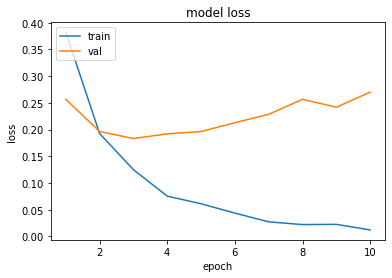

In [15]:
# 성능 평가
# 정확도 확인
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

# Loss 시각화
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

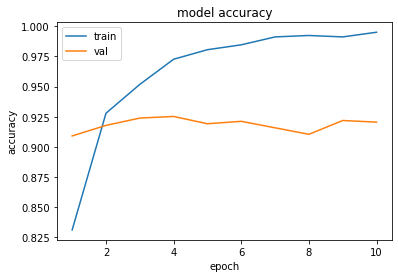

In [16]:
# 정확도 시각화 
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
# LSTM 모델 만들기
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 32)) 
model.add(LSTM(32)) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
93/93 [==============================] - 4s 25ms/step - loss: 0.4343 - acc: 0.7958 - val_loss: 0.2962 - val_acc: 0.8875
Epoch 2/10
93/93 [==============================] - 2s 23ms/step - loss: 0.2285 - acc: 0.9087 - val_loss: 0.2110 - val_acc: 0.9131
Epoch 3/10
93/93 [==============================] - 2s 22ms/step - loss: 0.1485 - acc: 0.9441 - val_loss: 0.1963 - val_acc: 0.9198
Epoch 4/10
93/93 [==============================] - 2s 23ms/step - loss: 0.1076 - acc: 0.9580 - val_loss: 0.1709 - val_acc: 0.9333
Epoch 5/10
93/93 [==============================] - 2s 23ms/step - loss: 0.0771 - acc: 0.9724 - val_loss: 0.1893 - val_acc: 0.9279
Epoch 6/10
93/93 [==============================] - 2s 23ms/step - loss: 0.0596 - acc: 0.9806 - val_loss: 0.1944 - val_acc: 0.9292
Epoch 7/10
93/93 [==============================] - 2s 23ms/step - loss: 0.0449 - acc: 0.9845 - val_loss: 0.2228 - val_acc: 0.9259
Epoch 8/10
93/93 [==============================] - 2s 23ms/step - loss: 0.0504 - a

100/100 [==============================] - 1s 5ms/step - loss: 0.2696 - acc: 0.9239

 테스트 정확도: 0.9239


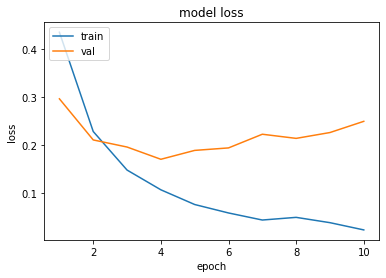

In [18]:
# 성능 평가
# 정확도 확인
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

# Loss 시각화
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

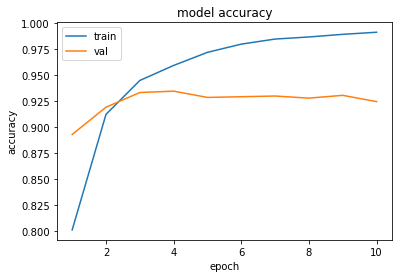

In [19]:
# 정확도 시각화 
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()